In [2]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.9 MB/s eta 0:00:00


In [21]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="yL6Fc3RD17DKovOEy2Kclw",
    client_secret="Vf-mSbXhnh3HgVg-me_c5q0Ze-rO4Q",
    user_agent=user_agent
)

In [22]:
import pandas as pd
import numpy as np
import re

In [43]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

🏆 Who's taking home the trophy this season? Vote for your team today!
1c4hlwo
i18n-leaderboard
1713171932.0
196
0.99
https://www.reddit.com/r/ipl/comments/1c4hlwo/whos_taking_home_the_trophy_this_season_vote_for/
0


In [44]:
headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

871


In [45]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Tackling Travis head in world cup
1,Never count Royals out in a chase 💪
2,"IPL retention 2011, Guess which teams went ln ..."
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...
4,Only one can make the plane for the T20 World ...


In [46]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Tackling Travis head in world cup
1,Never count Royals out in a chase 💪
2,"IPL retention 2011, Guess which teams went ln ..."
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...
4,Only one can make the plane for the T20 World ...


In [47]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [48]:
bitcoin_df.columns = ['Titles']

In [49]:
bitcoin_df.head()

,Titles
0,Tackling Travis head in world cup
1,Never count Royals out in a chase 💪
2,"IPL retention 2011, Guess which teams went ln ..."
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...
4,Only one can make the plane for the T20 World ...


In [50]:
bitcoin_df.Titles.duplicated().sum()

0

In [51]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Tackling Travis head in world cup
1,Never count Royals out in a chase 💪
2,"IPL retention 2011, Guess which teams went ln ..."
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...
4,Only one can make the plane for the T20 World ...


In [52]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Tackling Travis head in world cup
1,Never count Royals out in a chase
2,"IPL retention 2011, Guess which teams went ln ..."
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...
4,Only one can make the plane for the T20 World ...


In [53]:
!pip install textblob

In [54]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [55]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Tackling Travis head in world cup,0.000,0.000
1,Never count Royals out in a chase,0.000,0.000
2,"IPL retention 2011, Guess which teams went ln ...",0.725,0.625
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...,0.000,0.000
4,Only one can make the plane for the T20 World ...,1.000,0.000


In [56]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Tackling Travis head in world cup,0.000000,0.000000,Neutral
1,Never count Royals out in a chase,0.000000,0.000000,Neutral
2,"IPL retention 2011, Guess which teams went ln ...",0.725000,0.625000,Positive
3,LSG Captain Kl Rahul speaks about MS Dhoni ahe...,0.000000,0.000000,Neutral
4,Only one can make the plane for the T20 World ...,1.000000,0.000000,Neutral
5,Is anyone else irritated with the commentary d...,0.000000,0.000000,Neutral
6,Matches have become boring,1.000000,-1.000000,Negative
7,"If Punjab does not retain them, then they are ...",0.000000,0.000000,Neutral
8,Rohit Sharma became the second player after MS...,0.200000,-0.200000,Negative
9,That's how you do it kid,0.000000,0.000000,Neutral


In [57]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

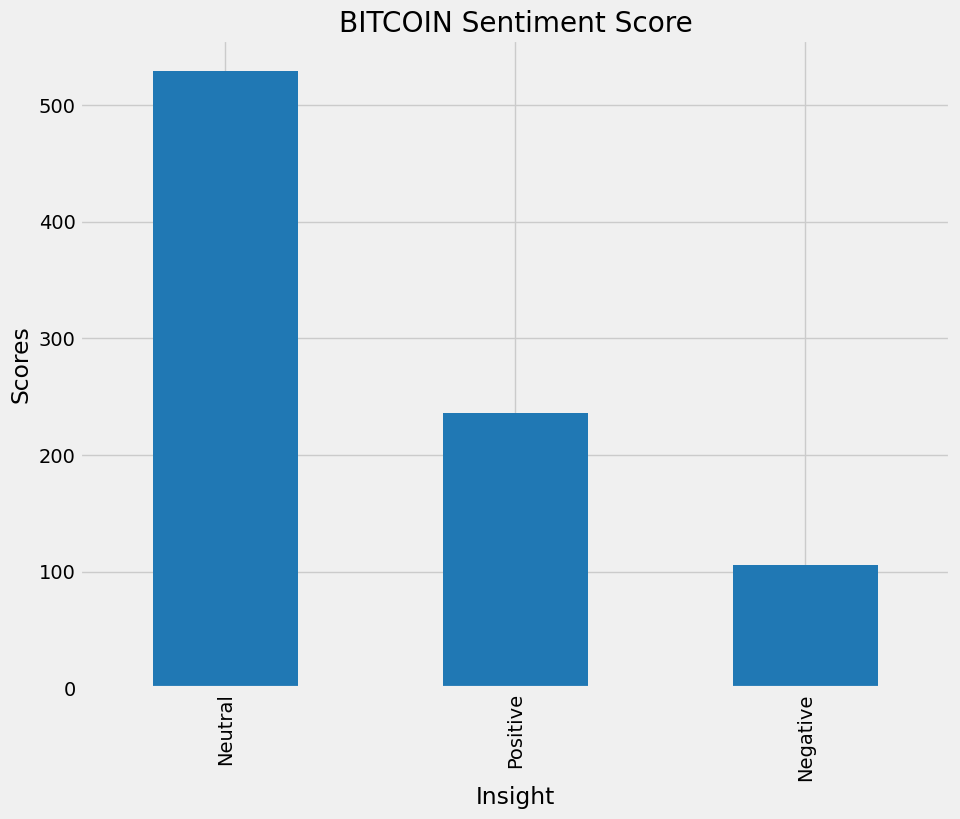

In [58]:
#Plot the values count of sentiment
plt.title("BITCOIN Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

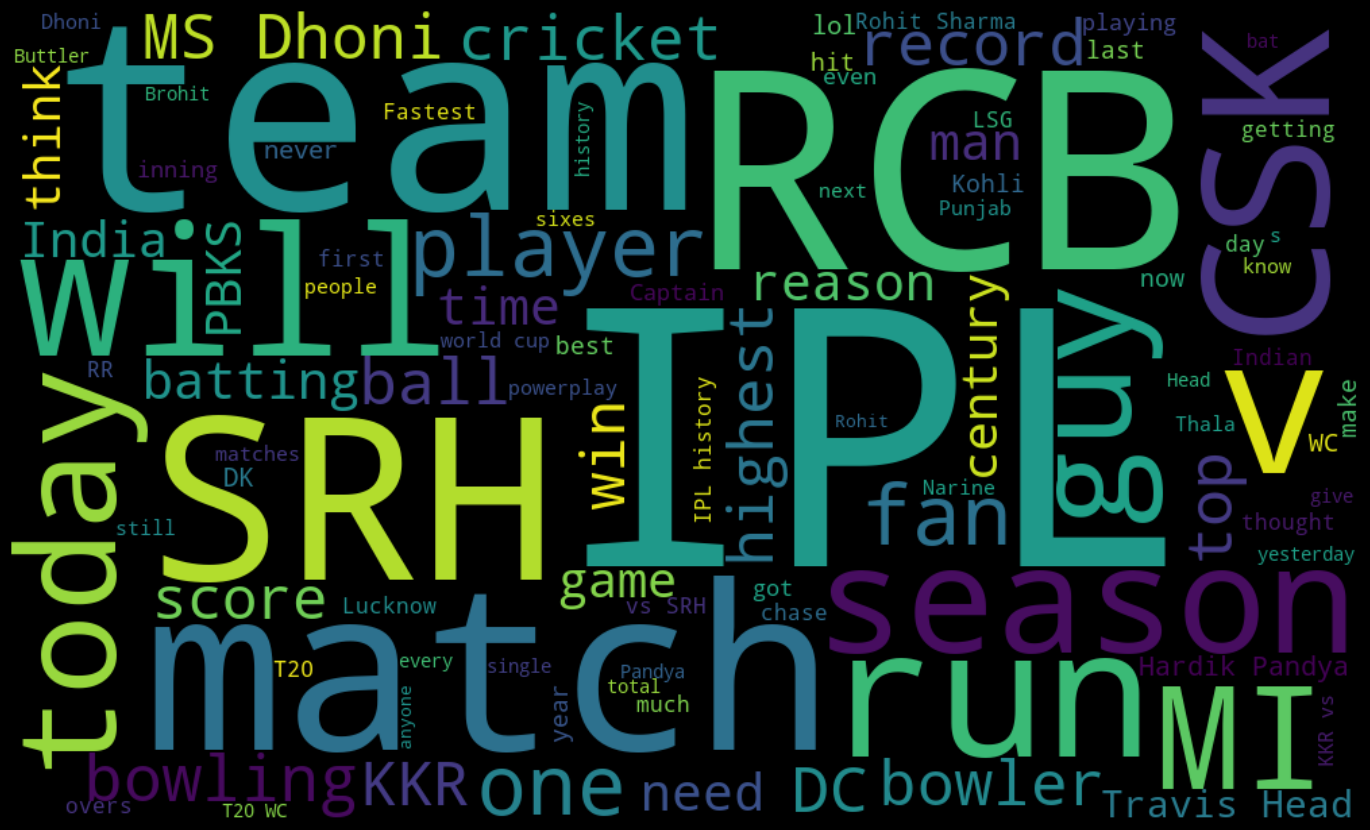

In [59]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");